In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
from tensorflow import keras
from keras.applications.resnet import ResNet50

In [11]:
HEIGHT = 256
WIDTH = 256

base_model = ResNet50(weights='imagenet',
                    include_top=False,
                    input_shape=(HEIGHT,WIDTH,3))

In [12]:
## getting data automatically from the folder

from keras.utils import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    directory="/content/train",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(HEIGHT,WIDTH)
)

test_ds = image_dataset_from_directory(
    directory="/content/test",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(HEIGHT,WIDTH) 
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
from keras.layers import Dense, Flatten, Dropout
from keras.models import  Model

def build_finetune_model(base_model, dropout_ratio, num_of_fc_layers_lst, num_classes):

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output 
    x = Flatten()(x)
    for num in num_of_fc_layers_lst:
        x = Dense(num,activation='relu')(x)
        # x = Dropout(dropout_ratio)(x)

    predictions = Dense(num_classes,activation='sigmoid')(x)


    finetune_model = Model(inputs=base_model.input,outputs=predictions)

    return finetune_model


dropout_ratio = 0.4,
num_of_fc_layers_lst = [1024,1024]
num_classes = 2

finetune_model = build_finetune_model(base_model,dropout_ratio,num_of_fc_layers_lst,num_classes)


In [14]:
num_epochs = 10

finetune_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                        metrics=['accuracy'])

In [15]:
history = finetune_model.fit(train_ds,validation_data=test_ds, epochs=num_epochs)

Epoch 1/10
625/625 [==============================] - 131s 193ms/step - loss: 1.0556 - accuracy: 0.9611 - val_loss: 0.2626 - val_accuracy: 0.9580
Epoch 2/10
625/625 [==============================] - 120s 192ms/step - loss: 0.1567 - accuracy: 0.9790 - val_loss: 0.1834 - val_accuracy: 0.9694
Epoch 3/10
625/625 [==============================] - 120s 192ms/step - loss: 0.0365 - accuracy: 0.9913 - val_loss: 0.1626 - val_accuracy: 0.9772
Epoch 4/10
625/625 [==============================] - 120s 191ms/step - loss: 0.0273 - accuracy: 0.9948 - val_loss: 0.1747 - val_accuracy: 0.9794
Epoch 5/10
625/625 [==============================] - 120s 191ms/step - loss: 0.0190 - accuracy: 0.9964 - val_loss: 0.1174 - val_accuracy: 0.9788
Epoch 6/10
625/625 [==============================] - 120s 191ms/step - loss: 0.0121 - accuracy: 0.9973 - val_loss: 0.1375 - val_accuracy: 0.9790
Epoch 7/10
625/625 [==============================] - 120s 191ms/step - loss: 0.0134 - accuracy: 0.9970 - val_loss: 0.2419 -

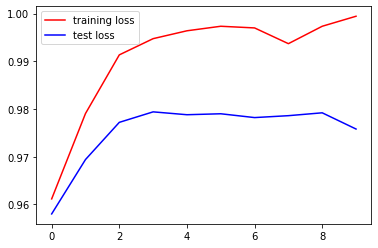

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='training loss')
plt.plot(history.history['val_accuracy'],color='blue',label='test loss')
plt.legend()
plt.show()

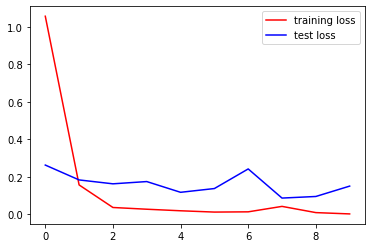

In [17]:
plt.plot(history.history['loss'],color='red',label='training loss')
plt.plot(history.history['val_loss'],color='blue',label='test loss')
plt.legend()
plt.show()